# PA005: High Value Customer Identification (Insiders)

## <font color = 'darkblue'> Ciclo 00 - Planejamento da Solução - Método IoT </f>

### Input - Entrada

1. Problema de Negócio
    - Seecionar os clientes mais valiosos para integrar um programa de fidelização


2. Conjunto de Dados
    - Vendas de um e-commerce onine, durante o período de um ano

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
    - Lista: client_id | is_insider
             102030    |   yes/1
             203040    |   no/2
             
2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegível? O que são clientes de maior valor?
    - Faturamento:
        - Alto ticket médio
        - Alto LTV
        - Baixa recência
        - Alto basket size
        - Baixa probabilidade de churn
        - Alta Previsão de LTV
        - Alta probabilidade de compra

    - Custo:
        - Baixa taxa de devolução
        
    - Experiência de compra:
        - Média alta das avaliações
        

2. Quantos clientes farão parte do grupo?
    - Número total de clientes 
        - Calcula a porcentagem do grupo insiders
        
        
3. Quais as principais características desses clientes ?
    - Escrever características do cliente:
        - Idade
        - Localização
        
    - Escrever caraterísitacas do consumo:
        - Atributos da Clusterização
        
        
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Faturamento total do ano
    - Faturameto do grupo Insiders
    
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - LTV do grupo Insiders
    - Análise de Cohort
    
    
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser similar ou parecido com uma pessoa/grupo
    
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade
    - A pessoa precisa ser diferente com uma pessoa/grupo
    
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Bayesino
    - Teste de hipóteses
    
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferência de compra
    - Frete
    - Visita a empresa

## <font color = 'darkblue'> Ciclo 01 - Métricas de Validação de Clusters </f>

1. Feature Engineering
    - Recência
    - Frequência
    - Monetização
    
    
2. Métricas de validação de Clsutering
    - WSS (within-Cluster Sum of Square)
    - SS (Silhouette Score)
    
    
3. Cluster Analysis
    - Plot 3D
    - Cluster Profile

## <font color = 'darkblue'> Ciclo 02 - Análise de Silhouette </f>

1. Feature Engineering
    - Average Ticket
    
    
2. Análise de Silhouette
    - Silhouette Analysis
    
    
3. Cluster Visualization
    - UMAP
    
    
4. Análise de Perfil dos Clusters
    - Descrição dos centróides

## <font color = 'darkblue'> Ciclo 03 - Estatística Descritiva </f>

1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos


2. Feature Engineering
    - Average Recency
    - Number od Returns
    

3. Data preparation
    - Standard Scaler

# <font color = 'green'> 0.0. Imports </f>

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from plotly import express as px
import umap.umap_ as umap

## <font color = 'green'> 0.1. Helper Functions </f>

## <font color = 'green'> 0.2. Load Dataset </f>

In [175]:
# load data
df_raw = pd.read_csv('data/Ecommerce.csv',encoding='unicode_escape')

# Remove extra columns
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

In [176]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# <font color = 'green'> 1.0. Data Description </f>

In [177]:
df1 = df_raw.copy()

## <font color = 'green'> 1.1. Rename Columns </f>

In [178]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
               'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [179]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
397536,571188,22625,RED KITCHEN SCALES,2,12-Oct-17,8.5,12783.0,Portugal


## <font color = 'green'> 1.2. Data dimensions </f>

In [180]:
print('Rows: {}'.format(df1.shape[0]))
print('Columns: {}'.format(df1.shape[1]))

Rows: 541909
Columns: 8


## <font color = 'green'> 1.3. Data Types </f>

In [181]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <font color = 'green'> 1.4. Chack NA </f>

In [182]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <font color = 'green'> 1.5. Replace NA </f>

In [183]:
df_missing = df1[df1['customer_id'].isna()]
df_not_missing = df1[~df1['customer_id'].isna()]

In [184]:
# create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000 + len(df_backup), 1)

# merge with orginal dataframe
df1 = pd.merge(df1, df_backup, how='left', on='invoice_no')

# coalesce 
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# drop extra columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'])

In [185]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## <font color = 'green'> 1.6. Change dtypes </f>

In [186]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [187]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer_id
df1['customer_id'] = df1['customer_id'].astype('int64')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [188]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## <font color = 'green'> 1.7. Descriptive Analysis </f>

In [189]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64'])

### <font color = 'b'> 1.7.1. Numericals Attributes </f>

In [190]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - desvio padrão, minimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

metrics = pd.concat([d2,d3,d4,ct1, ct2,d1,d5,d6]).T.reset_index()
metrics.columns = ['attributes', 'min', 'max', 'range','mean','median','std','skew','kurtosis']
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### <font color = 'b'> 1.7.1.1 Numericals Attributes - Investigating</f>

1. Quantidade Negativa (pode ser devolução)
2. Preço unitário igual a zero (pode ser promoção)

### <font color = 'b'> 1.7.2. Categorical Attributes </f>

#### Invoice No

In [191]:
df_letter_invoices = df1[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x)))]
df_letter_invoices.head()

print('Total number of invoices with letters: {}.'.format(len(df_letter_invoices)))
print('Total number of negative quantity in invoices with letters: {}.'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))

Total number of invoices with letters: 9291.
Total number of negative quantity in invoices with letters: 9288.


#### Stock Code

In [192]:
# check stock codes only characters
trash = df1[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$',x)))]['stock_code'].unique()
trash
# Action:
# remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [193]:
df1[df1['stock_code'].apply(lambda x: bool(re.search('[^0-9]+',x)))].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583


#### Description

In [194]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [195]:
# Action: delete description

#### Country

In [196]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [197]:
df1['country'].value_counts(normalize=True)*100

United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United Arab Em

In [198]:
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id',ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


# <font color = 'green'> 2.0. Filtering Variables </f>

In [199]:
df2 = df1.copy()

In [200]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [201]:
# === Numerical Attributes =====
# unit_price > 0.0
df2 = df2[df2['unit_price'] > 0.04]

# quantity
df2_purchase = df2[df2['quantity'] >= 0]
df2_returns = df2[df2['quantity'] < 0]

# === Categorical Attributes
# stock_code
df2 = df2[~df2['stock_code'].isin(trash)]

# description
df2 = df2.drop('description', axis=1)

# map
df2 = df2[~df2['country'].isin(['European Community','Unspecified'])]

In [202]:
df2_purchase

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,France,12680
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,France,12680
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,France,12680
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,France,12680


# <font color = 'green'> 3.0. Feature Engineering </f>

In [203]:
df3 = df2.copy()

## <font color = 'b'> 3.1. Feature Creation </f>

In [204]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


In [205]:
df_ref = df3.drop(['invoice_no','stock_code',
          'quantity','invoice_date','unit_price',
          'country'],axis=1).drop_duplicates(ignore_index=True)

### <font color = 'b'> 3.1.1. Gross Avenue </f>

In [206]:
# Gross Revenue (Faturamento) quantity * price
df2_purchase['gross_revenue'] = df2_purchase['quantity'] * df2_purchase['unit_price']

# Monetary
df_monetary = df2_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref,df_monetary, how='left',on='customer_id')
df_ref.isna().sum()

customer_id       0
gross_revenue    90
dtype: int64

### <font color = 'b'> 3.1.2. Recency Days </f>

In [207]:
# Recency - Last day purchase
df_recency = df2_purchase[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_ref = pd.merge(df_ref, df_recency[['customer_id','recency_days']], on ='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    90
recency_days     90
dtype: int64

### <font color = 'b'> 3.1.3. Quantiy of Products Purchase </f>

In [208]:
# Frequency
df_freq = df2_purchase[['customer_id','invoice_no']].drop_duplicates('invoice_no').groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id',how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    90
recency_days     90
invoice_no       90
dtype: int64

### <font color = 'b'> 3.1.4. Averege Ticket Value </f>

In [209]:
# Avg Ticket
df_avg_ticket = df2_purchase[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket,on='customer_id',how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    90
recency_days     90
invoice_no       90
avg_ticket       90
dtype: int64

### <font color = 'b'> 3.1.5. Averege Recency Days </f>

In [211]:
df2.loc[df2['customer_id'] == 17850, ['invoice_no','invoice_date']].drop_duplicates()

,invoice_no,invoice_date
0,536365,2016-11-29
7,536366,2016-11-29
47,536372,2016-11-29
49,536373,2016-11-29
66,536375,2016-11-29
84,536377,2016-11-29
278,536396,2016-11-29
315,536399,2016-11-29
416,536406,2016-11-29
433,536407,2016-11-29


In [240]:
df_aux = df2[['customer_id','invoice_date']].drop_duplicates().sort_values(['customer_id','invoice_date'],ascending=[True,False])
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['next_date'] = df_aux['invoice_date'].shift()
df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['next_date'] - x['invoice_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1)

df_aux = df_aux.drop(['invoice_date','next_customer_id','next_date'], axis=1).dropna()

# average recency days
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

# merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id',how='left')
df_ref.isna().sum()

### <font color = 'b'> 3.1.6. Frequency Purchase </f>

In [246]:
df2[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').max()

,invoice_date
customer_id,
12346,2017-01-16
12347,2017-12-05
12348,2017-09-23
12349,2017-11-19
12350,2017-01-31
...,...
22705,2017-12-06
22706,2017-12-06
22707,2017-12-07


In [259]:
df_aux = (df2[['customer_id','invoice_no','invoice_date']].drop_duplicates()
                                .groupby('customer_id')
                                .agg(max_ = ('invoice_date','max'),
                                     min_ = ('invoice_date', 'min'),
                                     days_ = ('invoice_date', lambda x:(x.max() - x.min()).days + 1),
                                     buy_ = ('invoice_no', 'count'))).reset_index()

df_aux['frequency'] = df_aux[['buy_', 'days_']].apply(lambda x: (x['buy_']/x['days_']) if x['days_'] != 0 else 0, axis=1)

In [260]:
df_aux

,customer_id,max_,min_,days_,buy_,frequency
0,12346,2017-01-16,2017-01-16,1,2,2.000000
1,12347,2017-12-05,2016-12-05,366,7,0.019126
2,12348,2017-09-23,2016-12-14,284,4,0.014085
3,12349,2017-11-19,2017-11-19,1,1,1.000000
4,12350,2017-01-31,2017-01-31,1,1,1.000000
...,...,...,...,...,...,...
5782,22705,2017-12-06,2017-12-06,1,1,1.000000
5783,22706,2017-12-06,2017-12-06,1,1,1.000000
5784,22707,2017-12-07,2017-12-07,1,1,1.000000
5785,22708,2017-12-07,2017-12-07,1,1,1.000000


In [46]:
df3 = df_ref.dropna()
df3.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
dtype: int64

# <font color = 'green'> 4.0. Exploratory Data Analysis </f>

In [47]:
df4 = df3.copy()

# <font color = 'green'> 5.0. Data Preparation </f>

In [48]:
df5 = df4.copy()

In [49]:
# Standard Scaler
ss = pp.StandardScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']] )
df5['recency_days'] = ss.fit_transform( df5[['recency_days']] )
df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']] )
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']] )

# <font color = 'green'> 6.0. Feature Selection </f>

In [50]:
df6 = df5.copy()

# <font color = 'green'> 7.0. Hyperparameter Fine Tuning </f>

In [51]:
X = df6.drop(columns=['customer_id'])

In [52]:
clusters = [2,3,4,5,6,7]

## <font color = 'b'> 7.1. Within-Cluster Sum of Square (WSS) </f>

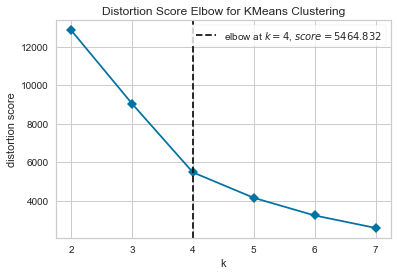

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'b'> 7.2. Silhouette Score (WSS) </f>

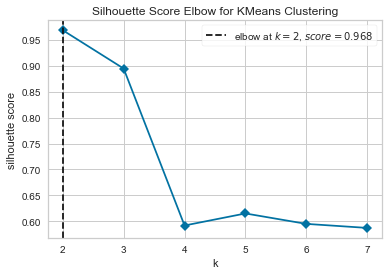

In [54]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters,metric = 'silhouette', timings = False)
kmeans.fit( X )
kmeans.show();

### <font color = 'b'> 7.2.1. Silhouette Analysis </f>

In [55]:
X.dtypes

gross_revenue    float64
recency_days     float64
invoice_no       float64
avg_ticket       float64
dtype: object

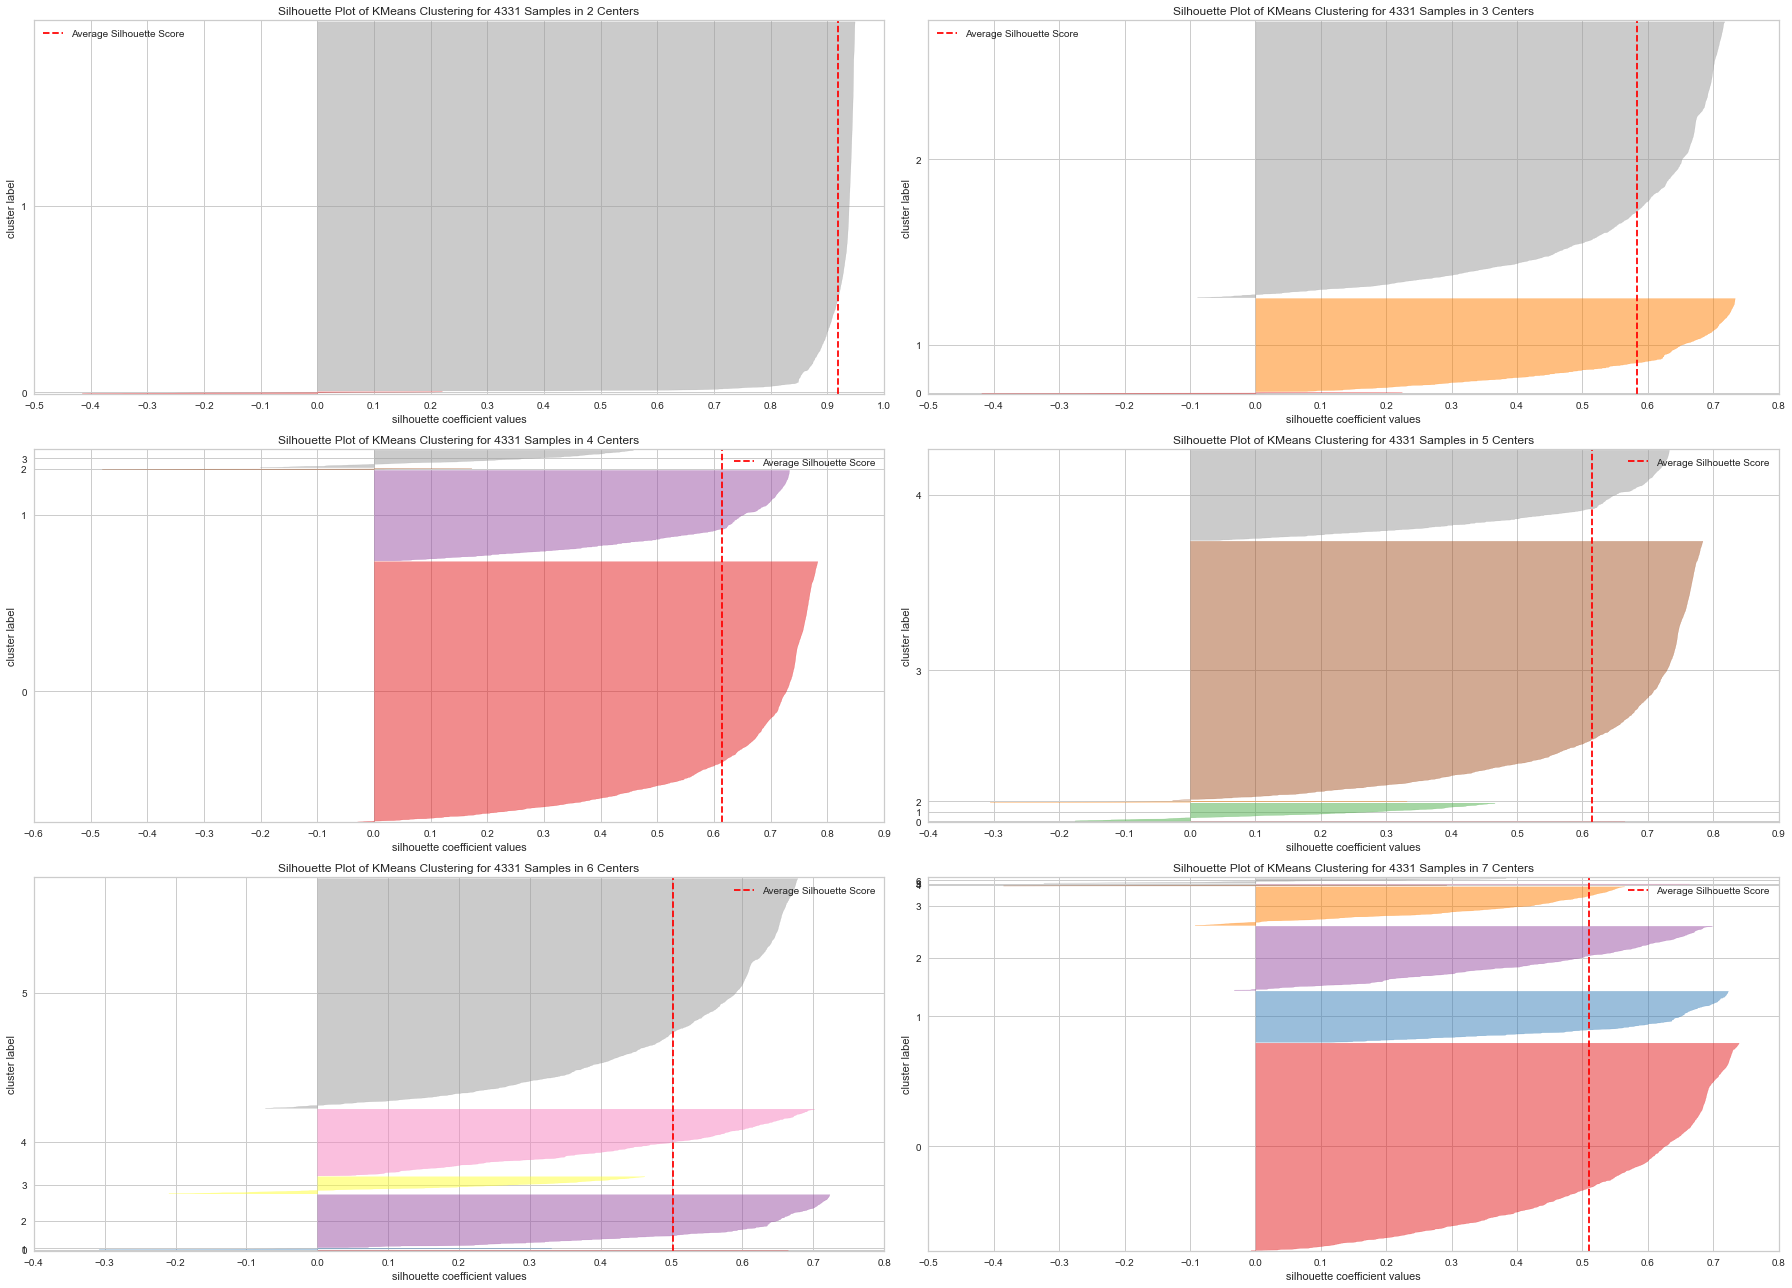

In [56]:
fig, ax = plt.subplots(3,2,figsize=(25,18))
for k in clusters:
    kn = c.KMeans(n_clusters = k, init = 'random', n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer(kn, color='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()

# <font color = 'green'> 8.0. Training Model </f>

## <font color = 'b'> 8.1. K-Means </f>

In [57]:
# model definition
k = 3

# model training
kmeans = c.KMeans(init='random',n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## <font color = 'b'> 8.2. Cluster Validation </f>

In [58]:
## WSS (Within Clusters Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)
print('SS: {}'.format(m.silhouette_score(X,labels, metric='euclidean')))

WSS value: 9306.454558611318
SS: 0.5832111022187288


# <font color = 'green'> 9.0. Cluster Analysis </f>

In [59]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.370775,2.798137,3.858949,-0.033856,1
1,13047,0.131350,-0.609622,0.743157,-0.033399,2
2,12583,0.580906,-0.899432,1.392280,-0.026143,2
3,13748,-0.123151,0.029957,0.094034,-0.023156,2
4,15100,-0.131183,2.408394,-0.165616,0.152610,1


## <font color = 'b'> 9.1. Visualization Inspection </f>

C:\Users\Notebook\anaconda3\envs\insiders-clustering-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


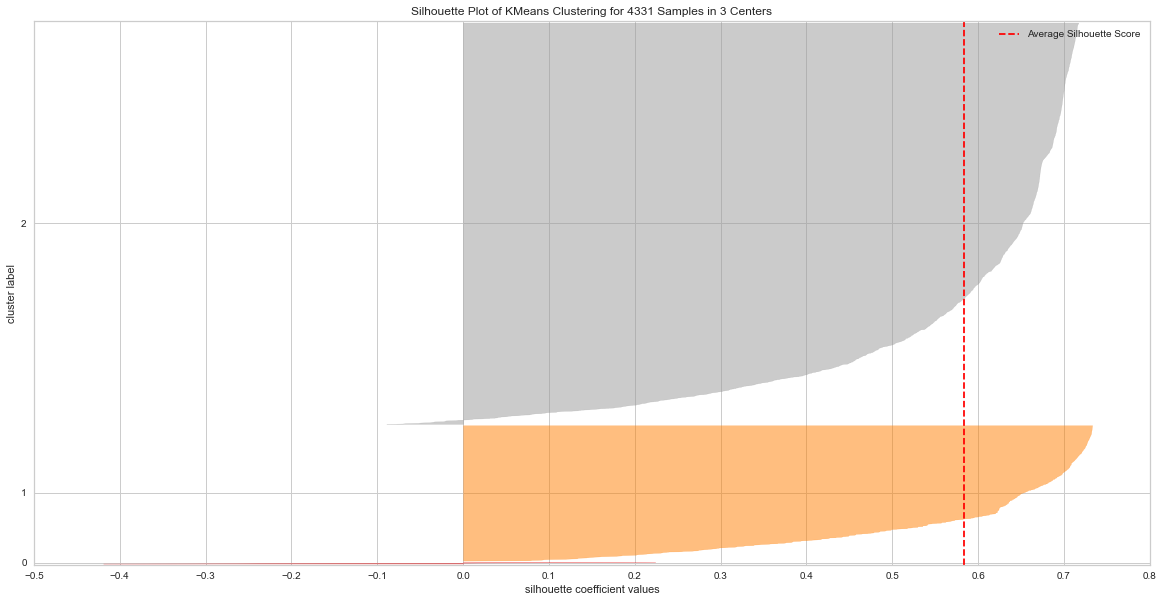

In [60]:
# fig = px.scatter_3d(df9,x='avg_ticket',y='invoice_no',z='gross_revenue',color='cluster')
# fig.show()

fig = plt.figure(figsize=(20,10))
visualizer = SilhouetteVisualizer(kmeans,color='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

### <font color = 'b'> 9.1.1 2D Plot </f>

In [61]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.370775,2.798137,3.858949,-0.033856,1
1,13047,0.131350,-0.609622,0.743157,-0.033399,2
2,12583,0.580906,-0.899432,1.392280,-0.026143,2
3,13748,-0.123151,0.029957,0.094034,-0.023156,2
4,15100,-0.131183,2.408394,-0.165616,0.152610,1


In [62]:
df_viz = df9.drop(columns='customer_id',axis=1)
# sns.pairplot(df_viz, hue='cluster', palette='viridis');

### <font color = 'b'> 9.1.2 UMAP </f>

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

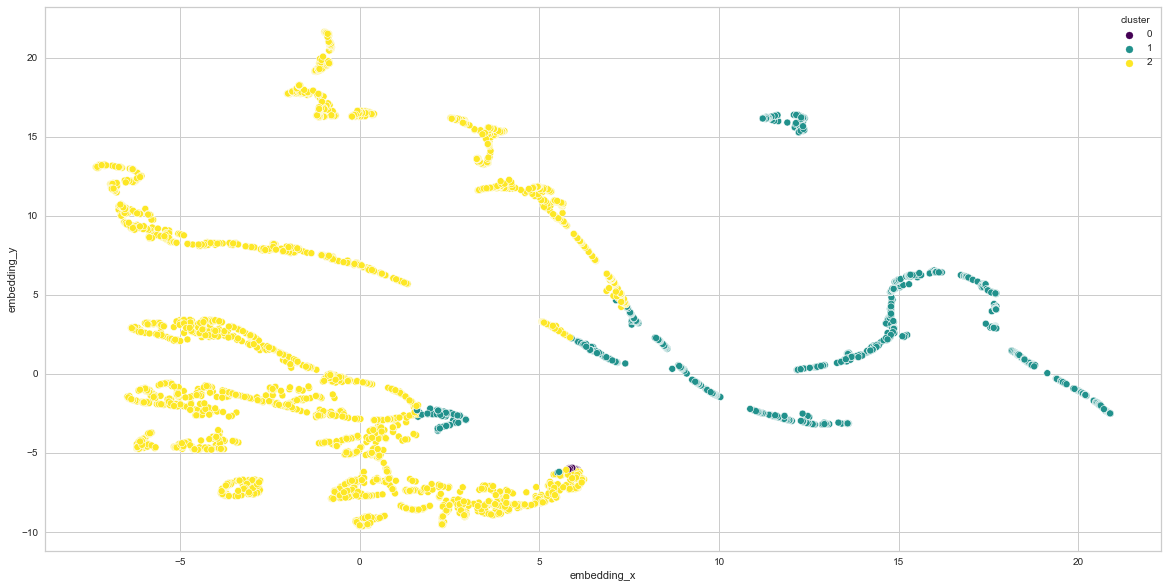

In [63]:
reducer = umap.UMAP( random_state=42)
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]
# df_viz['embedding_z'] = embedding[:,2]

# plot UMAP
fig = plt.figure(figsize=(20,10))
# px.scatter_3d(x='embedding_x',y='embedding_y',z='embedding_z',color='cluster',data_frame=df_viz).show()
sns.scatterplot(x='embedding_x',y='embedding_y',hue='cluster',palette='viridis', data=df_viz)

## <font color = 'b'> 9.2. Cluster Profile </f>

In [64]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.370775,2.798137,3.858949,-0.033856,1
1,13047,0.131350,-0.609622,0.743157,-0.033399,2
2,12583,0.580906,-0.899432,1.392280,-0.026143,2
3,13748,-0.123151,0.029957,0.094034,-0.023156,2
4,15100,-0.131183,2.408394,-0.165616,0.152610,1


In [65]:
# Number of customer
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Averege Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_avg_gross_revenue['perc_gross'] = 100*(df_avg_gross_revenue['gross_revenue']/df_avg_gross_revenue['gross_revenue'].sum())
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='left',on='cluster')

# Average Recency Days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='left',on='cluster')

# Averege Invoices
df_avg_invoices = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_avg_invoices['perc_invoices'] = 100*(df_avg_invoices['invoice_no']/df_avg_invoices['invoice_no'].sum())
df_cluster = pd.merge(df_cluster,df_avg_invoices,how='left',on='cluster')

# Averege Invoices
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_ticket,how='left',on='cluster')

In [66]:
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,perc_gross,recency_days,invoice_no,perc_invoices,avg_ticket
0,0,14,0.323251,13.529129,101.263959,-0.626040,9.404318,102.984080,6.541112
1,1,1089,25.144308,-0.166292,-1.244678,1.536166,-0.349683,-3.829281,-0.010678
2,2,3228,74.532441,-0.002576,-0.019282,-0.515527,0.077182,0.845201,-0.024767


### Cluster 01: Candidato à Insider 
    - Número de Customers: 6 (0.14% da base)
    - Recência média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: R$ 182.182,00 dolares
    
    
### Cluster 02:
    - Número de Customers: 31 (0.71% da base)
    - Recência média: 13 dias
    - Compras em média: 18 compras
    - Receita em média: R$ 40.543,00 dolares
    
### Cluster 00: 
    - Número de Customers: 4335 (99.15% da base)
    - Recência média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: R$ 1.372,00 dolares

# <font color = 'green'> 10.0. Deploy to Production </f>

# <font color = 'green'> 11.0. Sand Box </f>

## <font color = 'b'> 11.1. Original Dataset </f>

In [67]:
from sklearn import cluster as c

from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from matplotlib import pyplot as plt

C:\Users\Notebook\anaconda3\envs\insiders-clustering-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


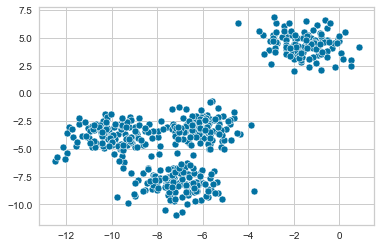

In [68]:
X, y= make_blobs(n_samples=500,
                 centers = 4,
                 cluster_std=1,
                 center_box = [-10,10],
                 shuffle=True,
                 random_state=1)

sns.scatterplot(X[:,0],X[:,1]);

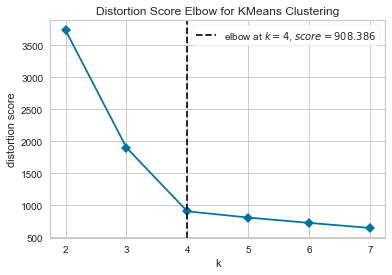

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show()

## <font color = 'b'> 11.2. Silhoutte Analysis </f>

IndexError: index 2 is out of bounds for axis 0 with size 2

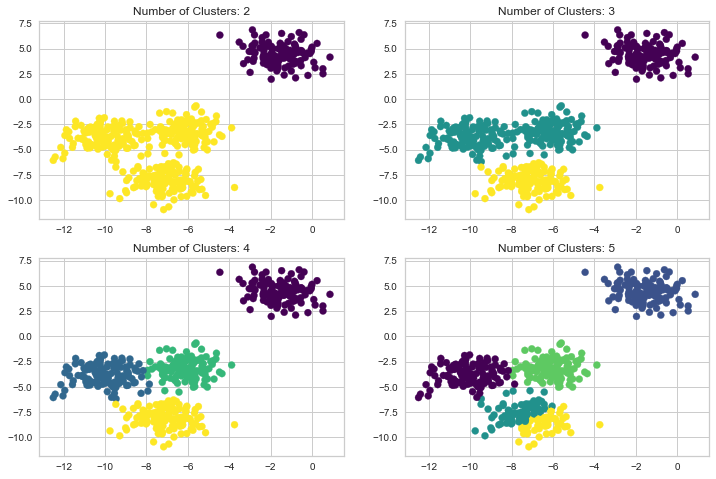

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    kmeans.fit(X)
    
    q, mod = divmod(i,2)
    ax[q-1,mod].scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis')
    ax[q-1,mod].set_title('Number of Clusters: {}'.format(i))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300, random_state=42)
    
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick',ax=ax[q-1,mod])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()